# 02 — Train Models on UCI (Imbalanced) Dataset

## Cell 1: Prediction and Evaluation / Result Save for comparison

In [13]:
from sklearn.metrics import accuracy_score, f1_score, classification_report
import pandas as pd

# ----------------------------
# Initialize storages (once)
# ----------------------------
if 'model_results' not in globals():
    model_results = pd.DataFrame(columns=["Model", "Accuracy", "Macro F1", "Weighted F1"])
if 'model_reports' not in globals():
    model_reports = {}

stored_preds = {}

# ----------------------------
# Evaluate each model
# ----------------------------
for model_name, clf in models:
    print(f"\n=== Evaluating {model_name} ===")
    y_test_pred = clf.predict(X_test_s)
    stored_preds[model_name] = y_test_pred
    
    # Scores
    test_acc = accuracy_score(y_test, y_test_pred)
    macro_f1 = f1_score(y_test, y_test_pred, average='macro', zero_division=0)
    weighted_f1 = f1_score(y_test, y_test_pred, average='weighted', zero_division=0)
    current_report = classification_report(y_test, y_test_pred, digits=3, zero_division=0)

    # Save/update numeric results
    if model_name in model_results["Model"].values:
        model_results.loc[model_results["Model"] == model_name, ["Accuracy", "Macro F1", "Weighted F1"]] = [
            test_acc, macro_f1, weighted_f1
        ]
    else:
        new_row = pd.DataFrame([[model_name, test_acc, macro_f1, weighted_f1]],
                               columns=["Model", "Accuracy", "Macro F1", "Weighted F1"])
        model_results = pd.concat([model_results, new_row], ignore_index=True)

    # Save classification report
    model_reports[model_name] = current_report

# ----------------------------
# Display Results
# ----------------------------
print("\nModel Comparison:")
display(model_results.style.format({
    "Accuracy": "{:.4f}",
    "Macro F1": "{:.4f}",
    "Weighted F1": "{:.4f}"
}))

# ----------------------------
# Print All Classification Reports
# ----------------------------
print("\nStored Classification Reports:\n")
for name, report in model_reports.items():
    print(f"----- {name} -----")
    print(report)
    print("\n")

print("\nEvaluation complete for all models.\n")



=== Evaluating KNN (k=1) ===

=== Evaluating Random Forest (n=300) ===

=== Evaluating Gradient Boosting ===

=== Evaluating XGBoost ===

Model Comparison:


,Model,Accuracy,Macro F1,Weighted F1
0,KNN (k=1),0.4632,0.1954,0.4632
1,Random Forest (n=300),0.6051,0.1788,0.5735
2,Gradient Boosting,0.6043,0.1727,0.5665
3,XGBoost,0.7267,0.2352,0.7012



Stored Classification Reports:

----- KNN (k=1) -----
              precision    recall  f1-score   support

           0      0.540     0.540     0.540      1874
           1      0.442     0.442     0.442      1590
           2      0.073     0.072     0.073       181
           3      0.096     0.104     0.100        77
           4      0.091     0.071     0.080        14
           5      0.143     0.125     0.133         8
           6      0.000     0.000     0.000         6

    accuracy                          0.463      3750
   macro avg      0.198     0.193     0.195      3750
weighted avg      0.463     0.463     0.463      3750



----- Random Forest (n=300) -----
              precision    recall  f1-score   support

           0      0.629     0.797     0.703      1874
           1      0.565     0.487     0.523      1590
           2      0.000     0.000     0.000       181
           3      1.000     0.013     0.026        77
           4      0.000     0.000     0.0

## Cell 2: Visualize Current Model Performance Graph


Visualizing 4 models (7 active classes)...


Showing results for: KNN (k=1)



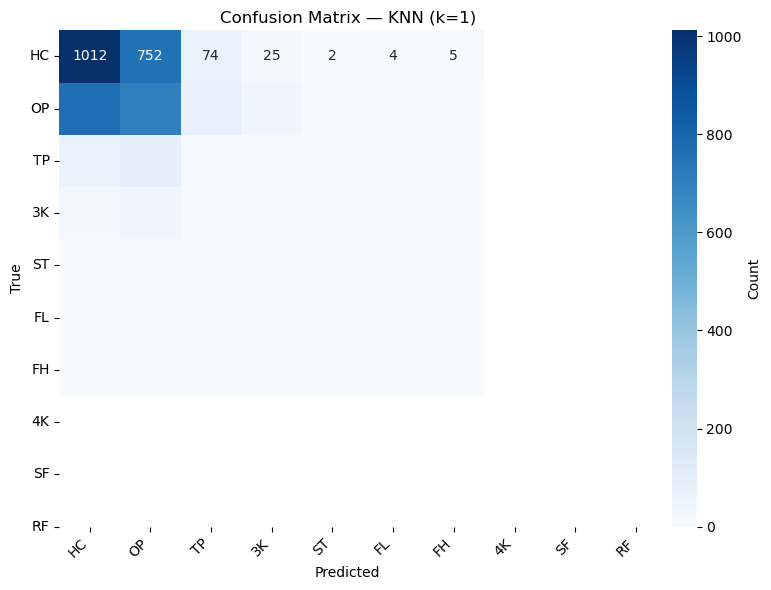

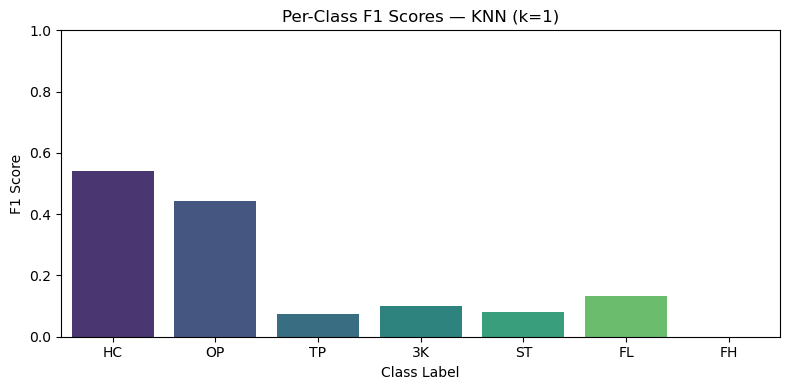

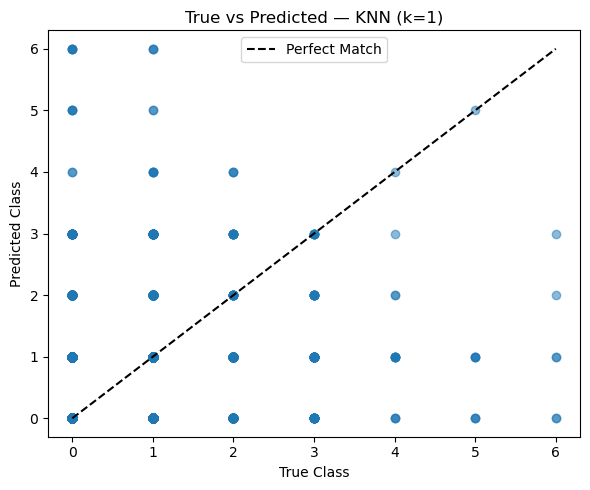

=========> MODEL SUMMARY
Model:         KNN (k=1)
Accuracy:       0.4632
Macro F1 Score:  0.1954
Weighted F1 Score:0.4632
-------------------------------------


Showing results for: Random Forest (n=300)



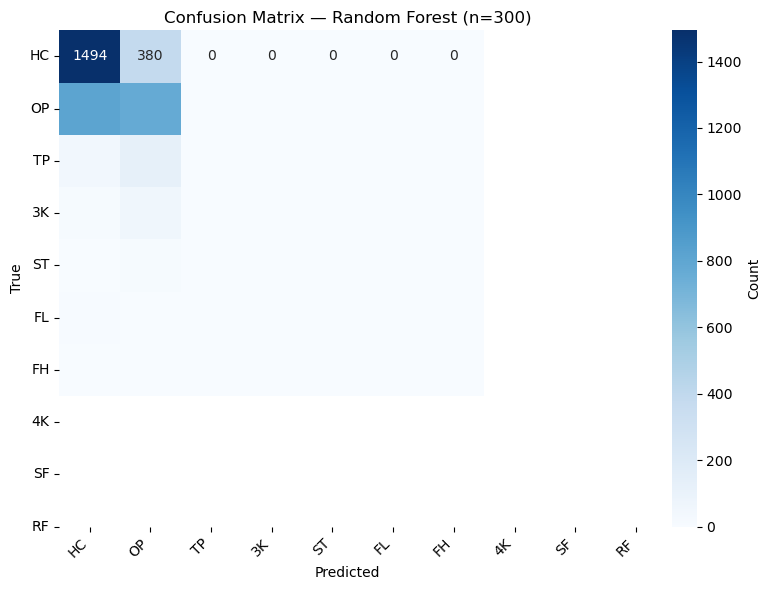

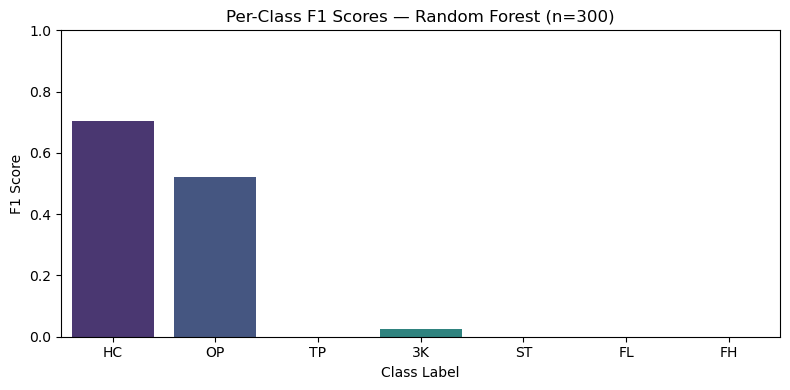

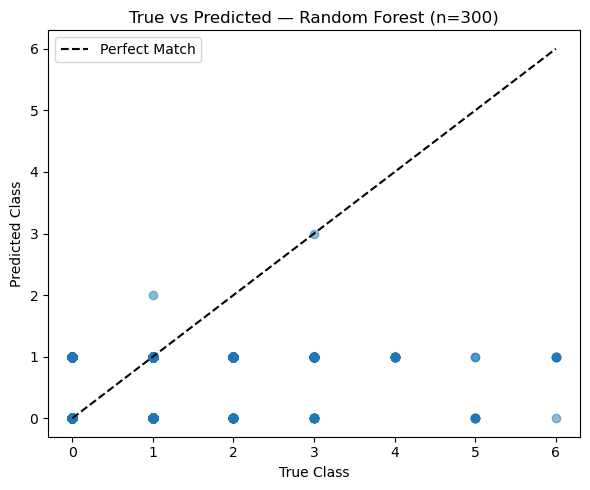

=========> MODEL SUMMARY
Model:         Random Forest (n=300)
Accuracy:       0.6051
Macro F1 Score:  0.1788
Weighted F1 Score:0.5735
-------------------------------------


Showing results for: Gradient Boosting



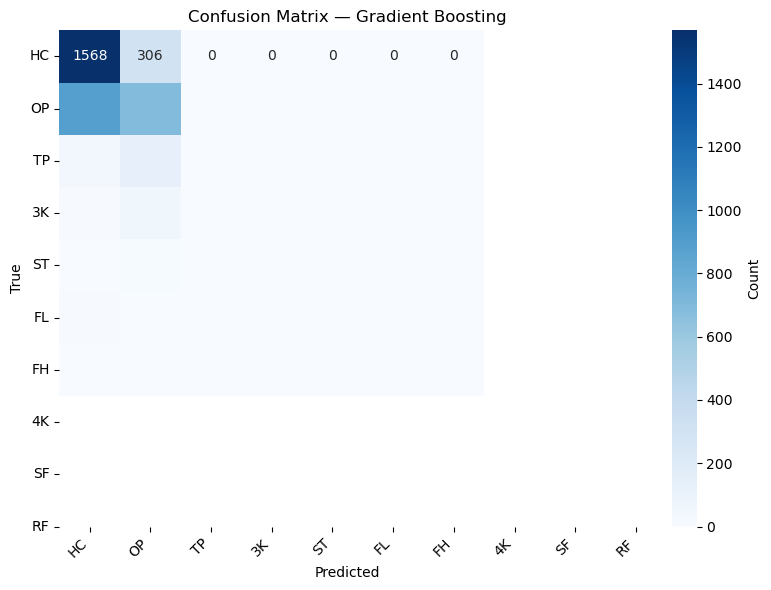

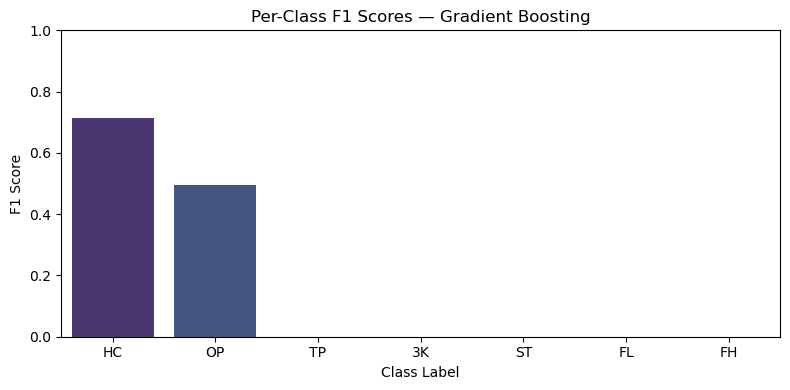

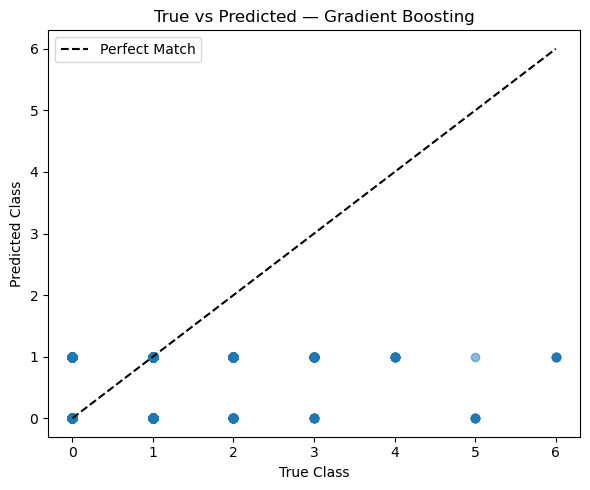

=========> MODEL SUMMARY
Model:         Gradient Boosting
Accuracy:       0.6043
Macro F1 Score:  0.1727
Weighted F1 Score:0.5665
-------------------------------------


Showing results for: XGBoost



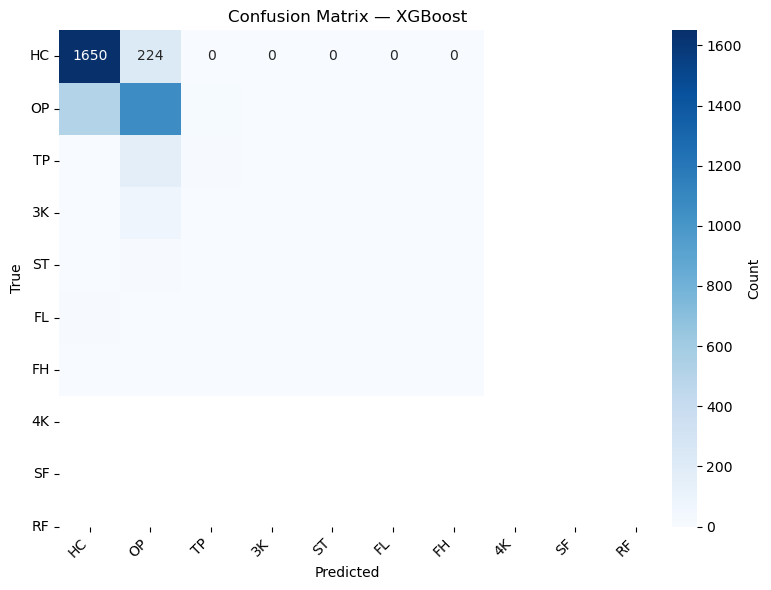

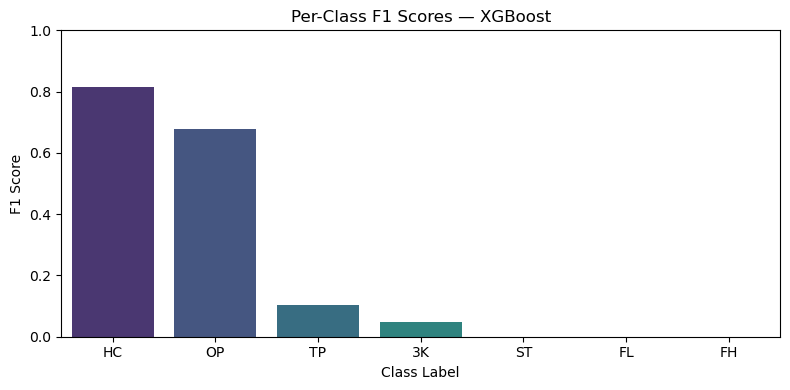

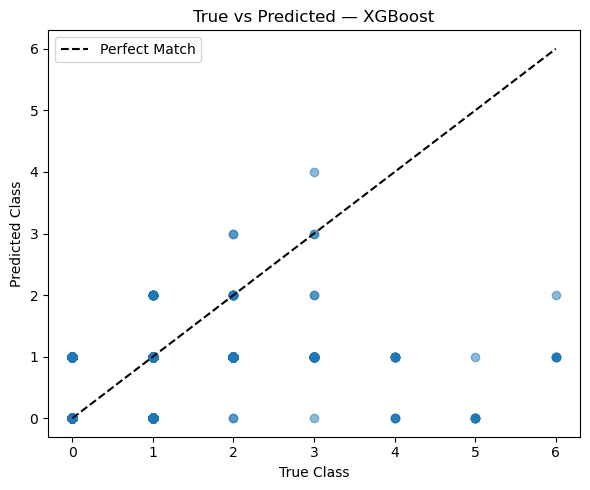

=========> MODEL SUMMARY
Model:         XGBoost
Accuracy:       0.7267
Macro F1 Score:  0.2352
Weighted F1 Score:0.7012
-------------------------------------


Cell 3 complete — all models visualized.



In [19]:
# ============================
# CELL 3 — Visualize ALL Stored Models (Dynamic Classes)
# ============================

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
import numpy as np

# Short labels (will trim automatically)
poker_labels_short = ["HC","OP","TP","3K","ST","FL","FH","4K","SF","RF"]

# Ensure predictions are stored
if 'stored_preds' not in globals() or len(stored_preds) == 0:
    raise ValueError("No stored predictions found. Run the first cell to evaluate models.")

n_classes = len(np.unique(y_test))  # dynamic class count
labels_for_plot = poker_labels_short[:n_classes]

print(f"\nVisualizing {len(stored_preds)} models ({n_classes} active classes)...\n")

for model_name, y_pred in stored_preds.items():
    print(f"\n============================")
    print(f"Showing results for: {model_name}")
    print(f"============================\n")

    # ----------------------------
    #  Confusion Matrix
    # ----------------------------
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        xticklabels=poker_labels_short,
        yticklabels=poker_labels_short,
        cbar_kws={"label": "Count"}
    )
    plt.title(f"Confusion Matrix — {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
    
    # ----------------------------
    # 2 Per-Class F1 Bar Chart
    # ----------------------------
    class_f1 = f1_score(y_test, y_pred, average=None, zero_division=0)
    plt.figure(figsize=(8,4))
    sns.barplot(x=np.arange(n_classes), y=class_f1, palette="viridis")
    plt.title(f"Per-Class F1 Scores — {model_name}")
    plt.xlabel("Class Label")
    plt.ylabel("F1 Score")
    plt.ylim(0, 1)
    plt.xticks(range(n_classes), labels_for_plot, rotation=0)
    plt.tight_layout()
    plt.show()

    # ----------------------------
    # [3]  True vs Predicted Scatter
    # ----------------------------
    plt.figure(figsize=(6,5))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([0,n_classes-1], [0,n_classes-1], 'k--', label="Perfect Match")
    plt.title(f"True vs Predicted — {model_name}")
    plt.xlabel("True Class")
    plt.ylabel("Predicted Class")
    plt.xticks(range(n_classes))
    plt.yticks(range(n_classes))
    plt.legend()
    plt.tight_layout()
    plt.show()

    # ----------------------------
    # [4] Summary
    # ----------------------------
    print("=========> MODEL SUMMARY")
    print(f"Model:         {model_name}")
    print(f"Accuracy:       {accuracy_score(y_test, y_pred):.4f}")
    print(f"Macro F1 Score:  {f1_score(y_test, y_pred, average='macro', zero_division=0):.4f}")
    print(f"Weighted F1 Score:{f1_score(y_test, y_pred, average='weighted', zero_division=0):.4f}")
    print("-------------------------------------\n")

print("\nCell 3 complete — all models visualized.\n")


Place `poker-hand-training-true.data` into `../data/` before running.